In [1]:
import shap
import pandas as pd
import joblib
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier


In [2]:
# Load trained model
model = joblib.load("models/model_v3.joblib")

In [3]:
# Load training data and compute relative abundance
df = pd.read_csv("microbial_counts.csv", index_col=0)
df = df.select_dtypes(include="number")
relative_abundance = df.div(df.sum(axis=0), axis=1) * 100
relative_abundance = relative_abundance.round(2)

In [4]:
# Transpose to samples as rows
X = relative_abundance.T

In [5]:
# Create SHAP explainer
explainer = shap.TreeExplainer(model)



In [6]:
# Compute SHAP values
shap_values = explainer.shap_values(X)


In [8]:
eexplainer = shap.TreeExplainer(model, model_output="probability")

# Compute SHAP values (returns list: [class_0, class_1])
shap_values = explainer.shap_values(X)

# Check consistency between model and data
print("Expected input shape:", X.shape)
print("SHAP values[1] shape:", shap_values[1].shape)

# Confirm feature names match
print("Features in X:", list(X.columns))
print("Model expects:", list(model.feature_names_in_))

# Plot SHAP summary for class 1 (Balanced-like)
shap.summary_plot(shap_values[1], X)


ValueError: Only model_output="raw" is supported for feature_perturbation="tree_path_dependent"

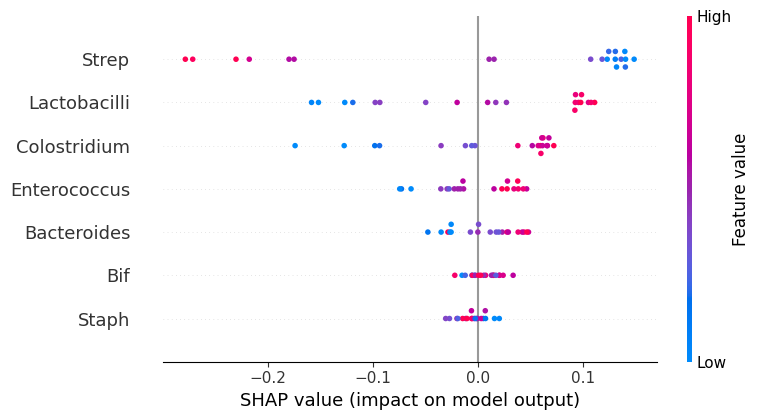

In [14]:
# Extract SHAP values for class 1 (Balanced-like)
shap_values_class1 = shap_values[:, :, 1]

# Plot beeswarm
shap.summary_plot(shap_values_class1, X)


In [ ]:
print("X shape:", X.shape)
print("SHAP values shape:", shap_values.shape)


X shape: (20, 7)
SHAP values shape: (20, 7, 2)


In [13]:
print("X shape:", X.shape)
print("SHAP values shape:", shap_values.shape)


X shape: (20, 7)
SHAP values shape: (20, 7, 2)
